In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import skimage.io
import os.path
import numpy as np

In [3]:
path = "../../proc_data/iphox_live_gradient_checks/BF_12hoursnaps2"

dset = "{0}hr_timepoint"
imgname = "Column_{0}_ch{1}.tif"

In [4]:
def get_image(time, column, chan):
    dsetp = dset.format(time)
    imgnamep = imgname.format(column, chan)
    return os.path.join(path, dsetp, imgnamep)

In [21]:
#timepts = [8] + [ i * 12 for i in range(1, 9)] 
timepts = [ i * 12 for i in range(1, 9)] 
timepts = [ t for t in timepts if t not in [12, 84]]
columns = list(range(1,11))
channels = [ "00", "02"]

In [22]:
timepts

[24, 36, 48, 60, 72, 96]

# First look at how the curves line up for each timepoint. 

In [23]:
means = {}
for time in timepts:
    for column in columns:
        for chan in channels:
            img = skimage.io.imread(get_image(time, column, chan))
            if img.shape[1] < 5120:
                imgnew = np.zeros((1024, 5120), dtype=np.uint16)
                imgnew[:, 5120-img.shape[1]: 5120] = img[:,:]
                img = imgnew
            means[(time, column, chan)] = img.mean(axis=0)
            

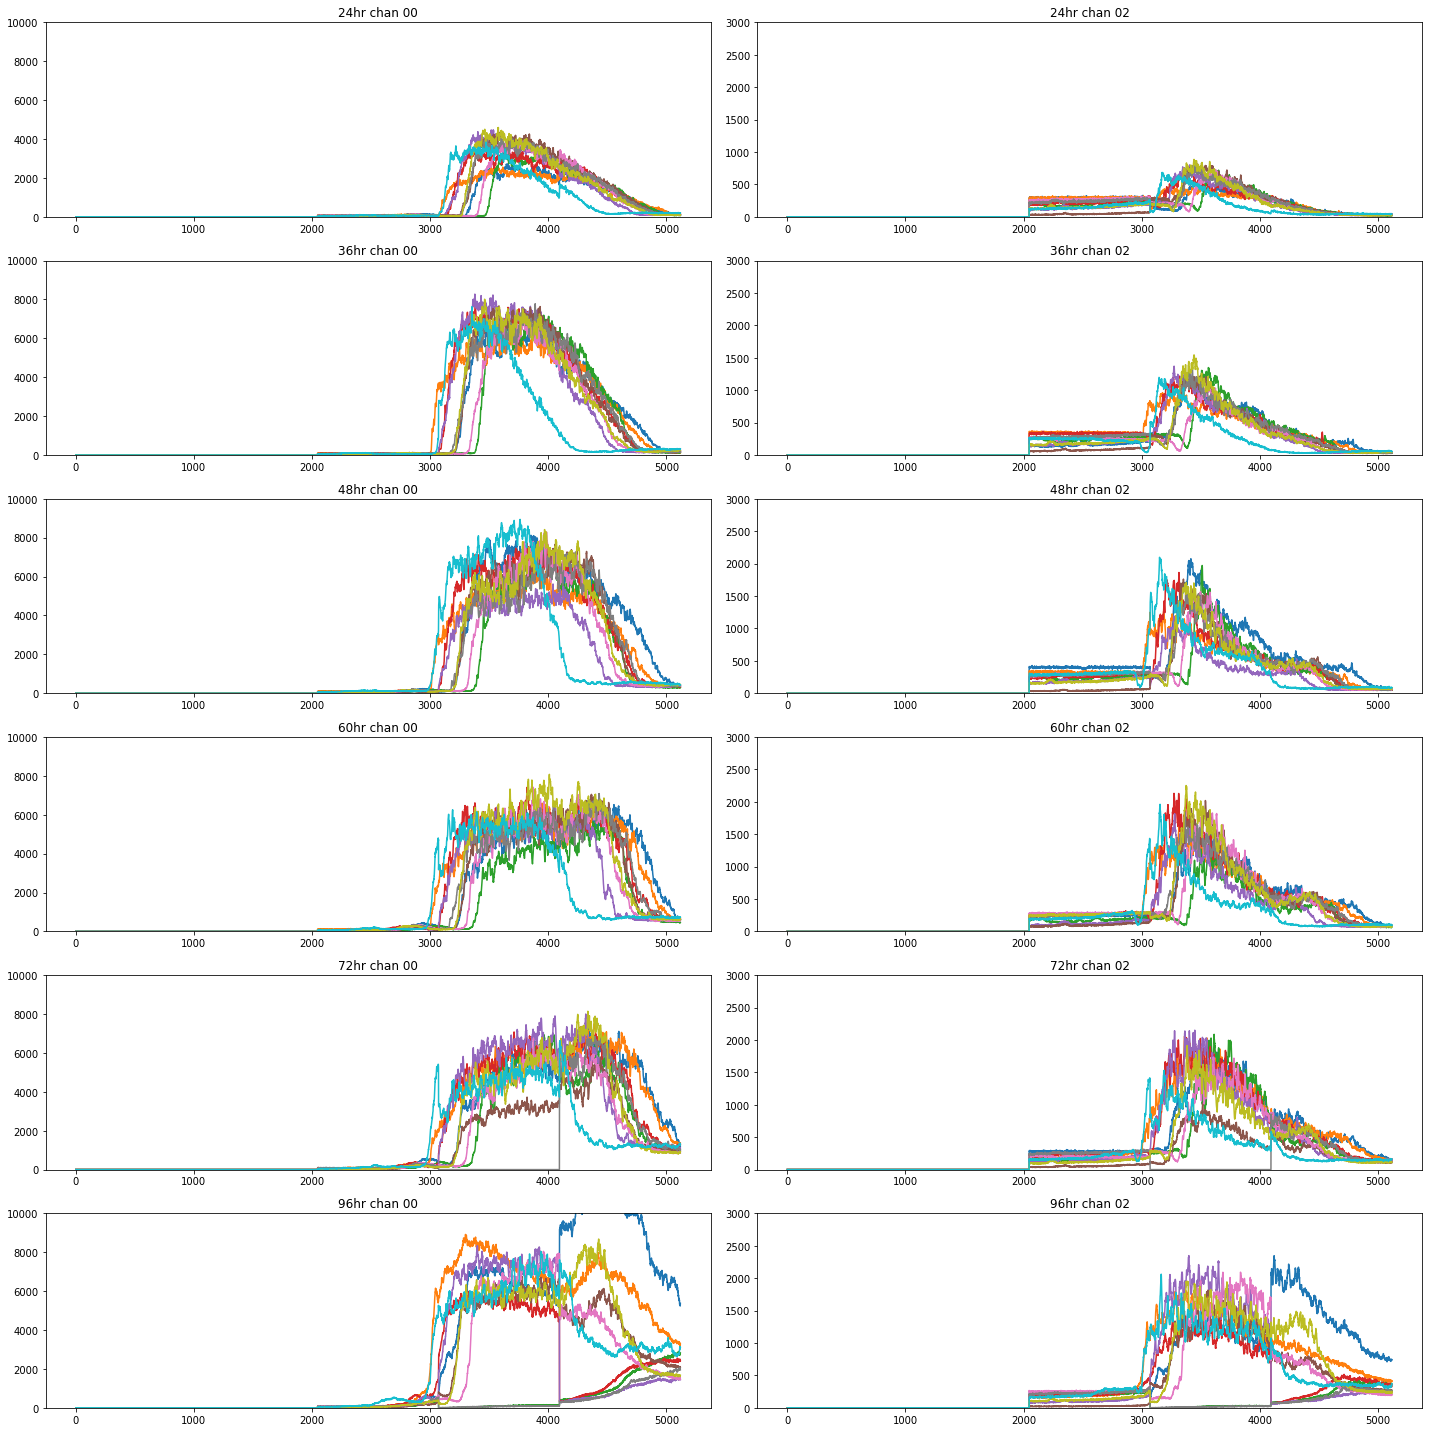

In [27]:
fig, ax = plt.subplots(len(timepts), 2)
fig.set_size_inches(20, 20)

for r, time in enumerate(timepts):
    for column in columns:
        for c, chan in enumerate(channels):
            ax[r,c].plot(means[(time, column, chan)])
            ax[r,c].set_title("{0}hr chan {1}".format(time, chan))
        ax[r, 0].set_ylim(0,10000)
        ax[r, 1].set_ylim(0,3000)
        
fig.tight_layout()



In [ ]:
fig, ax = plt.subplots(len(timepts), 2)
fig.set_size_inches(20, 20)

for r, time in enumerate(timepts):
    for column in columns:
        for c, chan in enumerate(channels):
            ax[r,c].plot(means[(time, column, chan)])
            ax[r,c].set_title("{0}hr chan {1}".format(time, chan))
        ax[r, 0].set_ylim(0,10000)
        ax[r, 1].set_ylim(0,3000)
        
fig.tight_layout()

## Look at the ratio of the two mean signals. 

Where there is no biofilm the green chanel noise is much higher than red. 

/Users/npm33/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


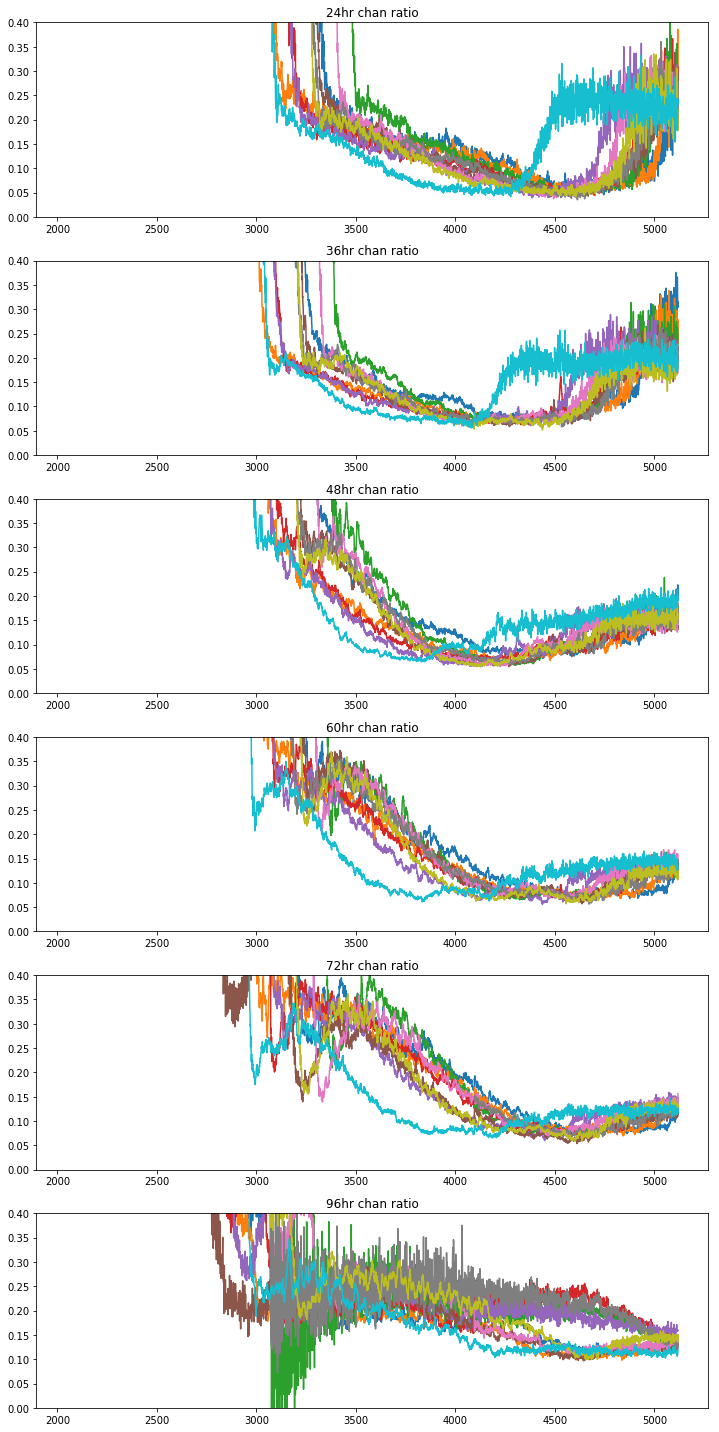

In [25]:
fig, ax = plt.subplots(len(timepts), 1)
fig.set_size_inches(10, 20)

for r, time in enumerate(timepts):
    for column in columns:
        ax[r].plot(means[(time, column, "02")]/means[(time, column, "00")])
        ax[r].set_title("{0}hr chan ratio".format(time))
        
for a in ax:
    a.set_ylim(0,0.4)
fig.tight_layout()